# Load Data/Libraries

In [23]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


# Custom Code/Set Visual Style

In [6]:
## Customization Options
plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [65]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    #loc_3months = mdates.MonthLocator(interval=3)
    #fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    #loc_year = mdates.YearLocator()
    #fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    #ax.xaxis.set_minor_locator(loc_3months)
    #ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    #ax.xaxis.set_major_locator(loc_year)
    #ax.xaxis.set_major_formatter(fmt_year)
    
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [67]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

# **Part 1**

In [8]:
df.iloc[0:4]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Filter 4 Largest Cities
- cities are already ranked by largest to smallest

In [9]:
# filter 4 largest cities

df_4 = df.iloc[0:4]
df_4

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt Dataframe to Long-Form

In [10]:
df_4.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [13]:
# melt to long-form
melted = pd.melt(df_4, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 
                                'StateName', 'State', 'Metro', 'CountyName'],
                 value_name='ZHVI', var_name='Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,ZHVI
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


### Convert Date to Datetime dtype

In [17]:
melted['Datetime'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   ZHVI        1087 non-null   float64       
 10  Datetime    1092 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 94.0+ KB


In [18]:
melted.drop(columns='Date', inplace=True)
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,ZHVI,Datetime
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,2000-01-31
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,2000-01-31
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,2000-01-31
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,2000-01-31
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0,2000-02-29


### Make 'Datetime' Column the Index

In [20]:
melted = melted.set_index('Datetime')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,ZHVI
Datetime,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


## Resample as Monthly Frequency, Group by City

In [24]:
df_ts = melted.groupby('RegionName').resample('M').sum()
df_ts

RegionID  SizeRank      ZHVI
RegionName Datetime                                
Chicago    2000-01-31     17426         3  166139.0
           2000-02-29     17426         3  166536.0
           2000-03-31     17426         3  167368.0
           2000-04-30     17426         3  168826.0
           2000-05-31     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-31      6181         0  768797.0
           2022-06-30      6181         0  773944.0
           2022-07-31      6181         0  777692.0
           2022-08-31      6181         0  779960.0
           2022-09-30      6181         0  781622.0

[1092 rows x 3 columns]

# **Part 2**

## Plot Home Value
- Using 'unstack'

In [32]:
unstacked = df_ts.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Datetime                                                                        
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                         ZHVI                                  
RegionName New York   Chicago   Houston Los Angeles  New York  
Datetime                                                       
2000-01-31        0  166139.0  109068.0    234181.0  253690.0  
2000-02-29        0  166536.0  109079.0    234401.0  255517.0  
2000-03-31        0  167368.0  108878.0    235513.0  257207.0  
2000-04-30        0  168826.0  108881.0    237589.0  260310.0  
2000-05-31        0  170499.0  108834.0    240113.0  263204.0  
...             ...       ...       ...         ...       ...  
2022-05-31        0  312487.0  265558.0    990391.0  768797.0  
2022-06-30        0  314663.0  268901.0    992337.0  773944.0  
2022-07-31        0  315910.0  271059.0    992630.0  777692.0  
2022-08-31        0  315587.0  272400.0    978196.0  779960.0  
2022-09-30        0  315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

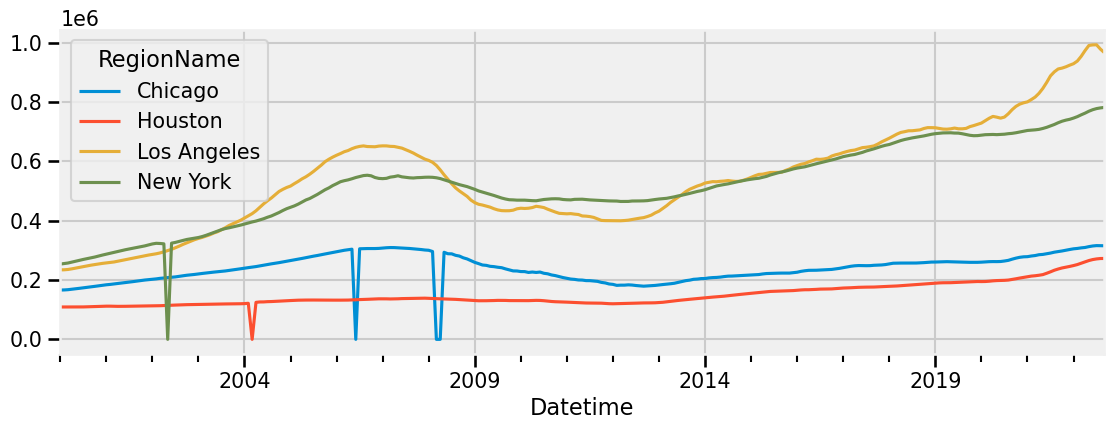

In [34]:
fig, ax = unstacked['ZHVI'].plot()

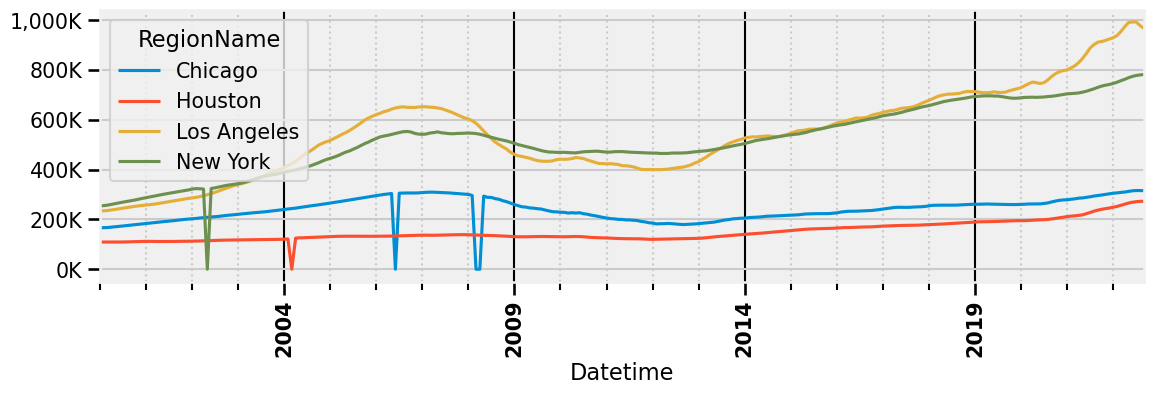

In [69]:
fig, ax = format_xdates(unstacked['ZHVI'].plot());

ax.yaxis.set_major_formatter(fmt_thous)

## Questions


### 1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?
- Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
***
- *New York* looks to have had the highest Typical Home Value at the end of 2008.


- *Houston* had the lowest.

In [85]:
df_ts.loc[pd.IndexSlice[:, '2008-12-31'], 'ZHVI'].idxmax()

('New York', Timestamp('2008-12-31 00:00:00', freq='M'))

In [86]:
df_ts.loc[pd.IndexSlice[:, '2008-12-31'], 'ZHVI'].idxmin()

('Houston', Timestamp('2008-12-31 00:00:00', freq='M'))

In [92]:
df_ts.loc[pd.IndexSlice[:, '2008'], :]

RegionID  SizeRank      ZHVI
RegionName  Datetime                                
Chicago     2008-01-31     17426         3  300207.0
            2008-02-29     17426         3  296063.0
            2008-03-31     17426         3       0.0
            2008-04-30     17426         3       0.0
            2008-05-31     17426         3  293467.0
            2008-06-30     17426         3  288495.0
            2008-07-31     17426         3  288174.0
            2008-08-31     17426         3  283199.0
            2008-09-30     17426         3  280695.0
            2008-10-31     17426         3  274849.0
            2008-11-30     17426         3  271059.0
            2008-12-31     17426         3  265306.0
Houston     2008-01-31     39051         2  138208.0
            2008-02-29     39051         2  137512.0
            2008-03-31     39051         2  136795.0
            2008-04-30     39051         2  136628.0
            2008-05-31     39051         2  136228.0
            2008-06-30     39051         2  135773.0
            2008-07-31     39051         2  135392.0
            2008-08-31     39051         2  134770.0
            2008-09-30     39051         2  133932.0
            2008-10-31     39051         2  133189.0
            2008-11-30     39051         2  132247.0
            2008-12-31     39051         2  131283.0
Los Angeles 2008-01-31     12447         1  603029.0
            2008-02-29     12447         1  596635.0
            2008-03-31     12447         1  586065.0
            2008-04-30     12447         1  571226.0
            2008-05-31     12447         1  554589.0
            2008-06-30     12447         1  539622.0
            2008-07-31     12447         1  524220.0
            2008-08-31     12447         1  510520.0
            2008-09-30     12447         1  500124.0
            2008-10-31     12447         1  490979.0
            2008-11-30     12447         1  481905.0
            2008-12-31     12447         1  469294.0
New York    2008-01-31      6181         0  546538.0
            2008-02-29      6181         0  546098.0
            2008-03-31      6181         0  544562.0
            2008-04-30      6181         0  541865.0
            2008-05-31      6181         0  537685.0
            2008-06-30      6181         0  533810.0
            2008-07-31      6181         0  529211.0
            2008-08-31      6181         0  525290.0
            2008-09-30      6181         0  521347.0
            2008-10-31      6181         0  518048.0
            2008-11-30      6181         0  514767.0
            2008-12-31      6181         0  510309.0

### 2. How much did the home values change from November 2008 to December 2008 (in dollars)?
- Hint: you can use .diff() to calculate the change in values
***
- *Chicago* value dropped by \$5,753


- *Houston* value dropped by \$964


- *Los Angeles* value dropped by \$12,611


- *New York* value dropped by \$4,458

In [103]:
unstacked['2008-11': '2008-12']['ZHVI']

RegionName,Chicago,Houston,Los Angeles,New York
Datetime,,,,
2008-11-30,271059.0,132247.0,481905.0,514767.0
2008-12-31,265306.0,131283.0,469294.0,510309.0


In [102]:
unstacked['2008-11': '2008-12']['ZHVI'].diff()

RegionName,Chicago,Houston,Los Angeles,New York
Datetime,,,,
2008-11-30,NaN,NaN,NaN,NaN
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0
